In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC

from mlxtend.classifier import StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import plotly.express as px
from matplotlib import pyplot as plt
import scikitplot as skplt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


ImportError: cannot import name 'interp' from 'scipy' (/opt/conda/lib/python3.10/site-packages/scipy/__init__.py)

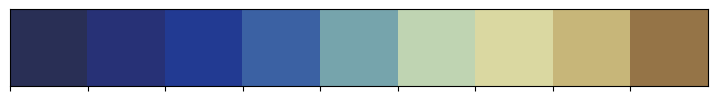

In [4]:
import seaborn as sns
cm = ["#273176","#3B61A3","#76A4AC","#BFD4B2","#DAD8A1"]
gradient = ["#292F55","#273176","#223A92","#3B61A3","#76A4AC","#BFD4B2","#DAD8A1","#C7B679","#957447"]
sns.palplot(gradient)

In [5]:
path = "/kaggle/input/titanic/"
df_tr = pd.read_csv(f"{path}train.csv").set_index("PassengerId", drop=True)
df_ts = pd.read_csv(f"{path}test.csv").set_index("PassengerId", drop=True)
df = pd.concat([df_tr, df_ts], axis=0)
df.head(10).style.background_gradient(cmap='Blues')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.000000,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
2,1.000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
3,1.000000,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
4,1.000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
5,0.000000,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
6,0.000000,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
7,0.000000,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
8,0.000000,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
9,1.000000,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S


In [7]:
df["Deck"] = df["Cabin"].str[:1]
df["Deck"] = df["Deck"].replace(np.nan,"N/A")
print("All Deck descriptors:")
print(set(df["Deck"].values))

All Deck descriptors:
{'B', 'E', 'A', 'F', 'G', 'D', 'N/A', 'C', 'T'}


In [8]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
dfplt = dfplt[dfplt["Deck"]!="N/A"]
fig = px.histogram(dfplt, x="Deck",color="Survived",
                   color_discrete_sequence=cm)
fig.show()

In [9]:
df.loc[df["Deck"]=='T',"Deck"] = 'N/A'

In [10]:
replaces = {'B51 B53 B55': 'B55', 'B52 B54 B56': 'B56', 'B57 B59 B63 B66': 'B66', 'B58 B60': 'B60', 
            'B82 B84': 'B84', 'B96 B98': 'B98', 'C22 C26': 'C26', 'C23 C25 C27': 'C27', 'C55 C57': 'C57',
            'C62 C64': 'C64', 'D10 D12': 'D12', 'E39 E41': 'E41', 'F E46': 'E46', 'F E57': 'E57',
            'F E69': 'E69', 'F G63': 'G63', 'F G73': 'G73', 'F': None, 'D': None, ' ': None, 'T': None, np.nan: None}
df["Cabin"] = df["Cabin"].replace(replaces)
df["Cabin"] = df.fillna(np.nan)["Cabin"].str[1:].astype(float)

In [11]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Cabin",color="Survived", height=300,
                   color_discrete_sequence=cm)
fig.show()